# Анализ данных клиентов интернет-магазина "Стримчик"

**Задача:** выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Знакомство с данными

In [1]:
import pandas as pd


games = pd.read_csv('/datasets/games.csv')
games.info()
games.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Сразу бросаются в глаза названия столбцов, их надо перевести в нижний регистр. В столбцах с годом выпуска, оценкой критиков, оценкой пользователей и рейтингом международной ассоциации есть нулевые значения. Необходимо понять, с чем это связано и как эти пропуски можно обработать. Также стоит заменить тип данных в столбцах "год выпуска" (с *float* на *datetime*) и "оценка пользователей" (с *object* на *float*). 

## Предобработка данных

In [2]:
#перевод названий столбцов в нижний регистр
new_cols = []

for item in games.columns:
    name = item.lower()
    new_cols.append(name)

games.columns = new_cols
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [3]:
#замена типа данных
games['user_score'] = games['user_score'].replace('tbd', 'NaN')
games['user_score'] = games['user_score'].astype('float')

Значения *tbd* (to be determined - будет определно позже) в столбце "год выпуска" решено заменить на пустое значение, т.к. такое значение не даёт никакой полезной информации о рейтинге игры. Тип данных в столбце изменён на *float*.

In [4]:
games.query('year_of_release.isna() == True').sort_values(by='na_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
...,...,...,...,...,...,...,...,...,...,...,...
11000,Demon Chaos,PS2,NaN,Action,0.00,0.00,0.09,0.00,NaN,NaN,NaN
10837,Egg Monster Hero,DS,NaN,Role-Playing,0.00,0.00,0.09,0.00,NaN,NaN,E
15022,Umineko no Naku Koro ni San: Shinjitsu to Gens...,PS3,NaN,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
10764,Luminous Arc 2 (JP sales),DS,NaN,Role-Playing,0.00,0.00,0.10,0.00,NaN,NaN,NaN


Заменить пустые значения в столбцах "год выпуска" невозможно, так как получить эти данные иными, принятыми в аналитике, путями не представляется разумным. Следовательно, сменить тип данных, как это планировалось ранее, не получится.

Считать среднее, медиану или заменять NaN на 0 в столбцах "оценка критиков" и "оценка пользователей" также не вижу смысла, лучше просто не учитывать эти строки таблицы при проведении расчётов с рейтингами, чтобы они не портили выходные данные.

In [5]:
#суммарные продажи во всех регионах
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


## Исследовательский анализ данных

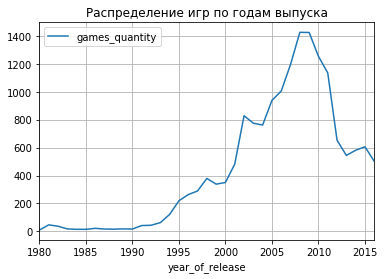

In [29]:
#изменение количества выпускаемых игр с течением времени
games_by_year = games.pivot_table(index='year_of_release', values='platform', aggfunc='count')
games_by_year.columns = ['games_quantity']
games_by_year.plot(title='Распределение игр по годам выпуска', grid=True)

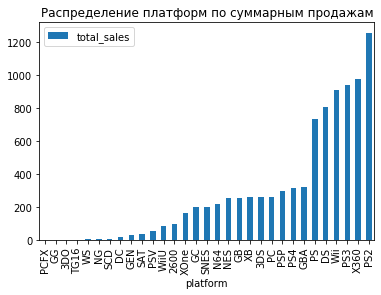

In [7]:
platforms_by_sales = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales')
platforms_by_sales.plot(kind='bar', title='Распределение платформ по суммарным продажам')

Судя по графику, платформами с наибольшими суммарными продажами можно назвать DS, PS, PS2, PS3, Wii и X360.

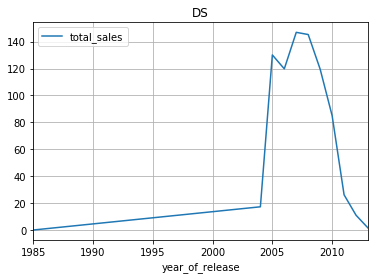

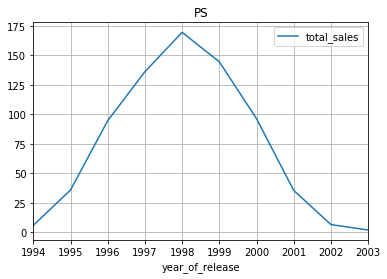

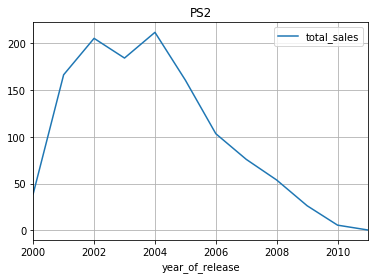

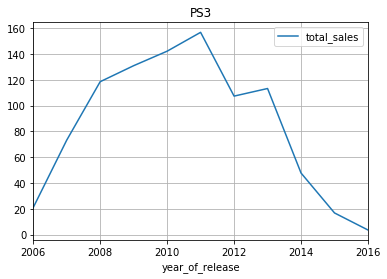

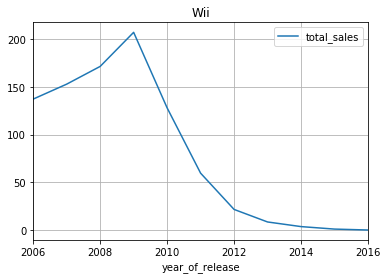

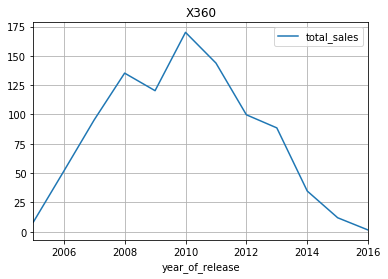

In [8]:
#За какой характерный срок появляются новые и исчезают старые платформы?
from matplotlib import pyplot as plt


pf_list = ['DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360']
life_list = []

for pf in pf_list:
    platform_data = games.query('platform == @pf')
    platform_year = platform_data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    platform_year.plot(title=pf, grid=True)
    platform_year = platform_year.reset_index()
    pf_life = platform_year['year_of_release'].max() - platform_year['year_of_release'].min()
    life_list.append(pf_life)

In [9]:
life_time = pd.DataFrame(data=life_list, columns=['year'])
print('Медианное время жизни платформы: {:.0f} лет'.format(life_time['year'].median()))

Медианное время жизни платформы: 10 лет


Определим актуальный период как 5 лет, то есть середина жизни платформы. Как видно из графиков выше, зачастую пик популярности платформы приходится на середину её жизни. Платформа на пике популярности? Значит и игры на неё будут наиболее успешны в финансовом плане.

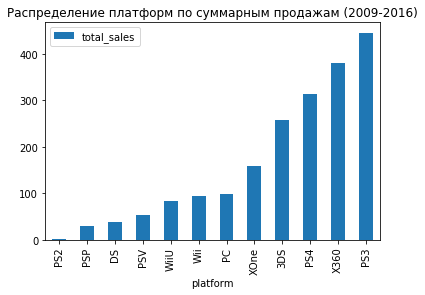

In [10]:
#срез таблицы, начиная с 2009 года
games_recent = games.query('year_of_release >= 2011')
recent_platforms = games_recent.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales')
recent_platforms.plot(kind='bar', title='Распределение платформ по суммарным продажам (2009-2016)')

Значительно выделяются из общей массы PlayStation3, PlayStation4, Nintendo3DS и XBox360. Однако судя по графикамы выше, PlayStation3 и XBox360 находятся уже в конце своего жизненного цикла и почти перестали приносить прибыль.

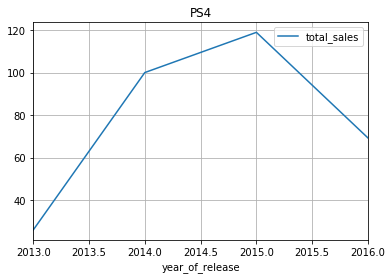

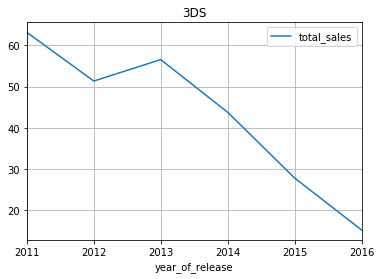

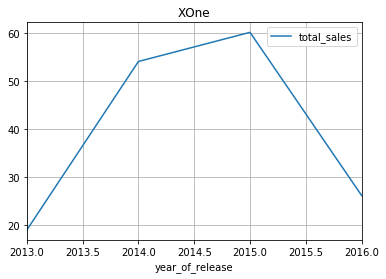

In [11]:
selected_plfs = ['PS4', '3DS', 'XOne']

for plf in selected_plfs:
    plf_data = games_recent.query('platform == @plf')
    plf_year = plf_data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    plf_year.plot(title=plf, grid=True)

Nintendo3DS также уже не приносит должной прибыли. Для последующего анализа в качестве наиболее перспективных выберем PS4 и XOne.

PS4


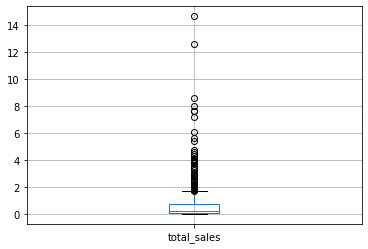

XOne


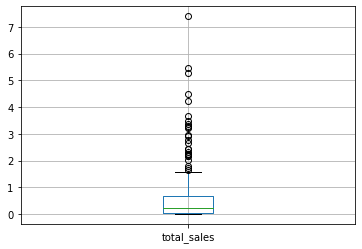

PS3


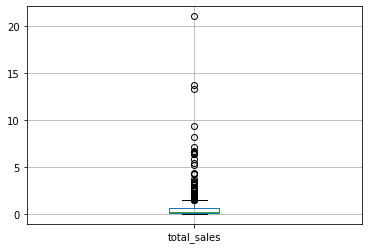

X360


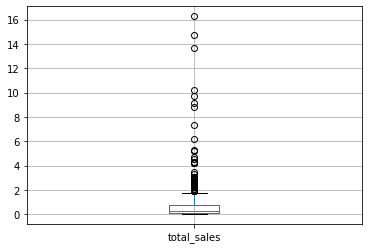

3DS


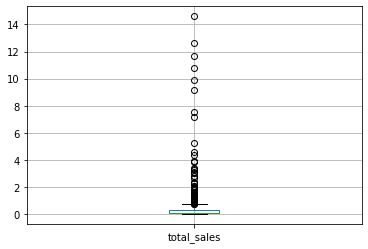

In [12]:
#график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам

prospective_plfs = ['PS4', 'XOne', 'PS3', 'X360', '3DS']

prospective_plfs_data = games_recent.query('platform.isin(@prospective_plfs)')
prospective_plfs_sales = prospective_plfs_data.pivot_table(index=['platform', 'name'], values='total_sales', aggfunc='sum')

for plf_name in prospective_plfs:
    sales_by_platform = prospective_plfs_sales.query('platform == @plf_name')
    print(plf_name)
    sales_by_platform.boxplot()
    plt.show()

В среднем у всех платформ можно заметить следующую тенденцию: медианные продажи крайне низкие. Однако выбросов при этом очень много и некоторые доходят до очень высоких значений по продажам. Отсюда можно сделать вывод, что время от времени выстреливают отдельные крайне удачные игры. Что сразу бросается в глаза, самые низкие продажи всё же у Nintendo 3DS и Playstation 3.

Коэффициент корреляции между продажами и оценкой критиков: 0.37605073033560016
Коэффициент корреляции между продажами и оценкой пользователей: 0.026670646119313232


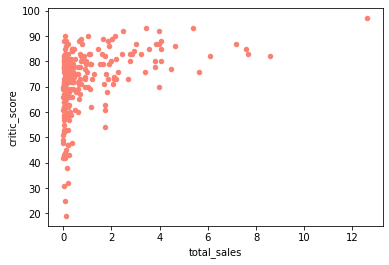

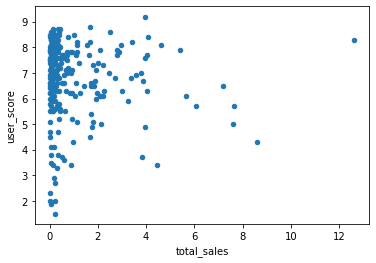

In [13]:
#влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы 

pd.options.mode.chained_assignment = None

prospective_plfs_data.dropna(subset=['critic_score', 'user_score', 'name'], inplace=True)

ps4_data = prospective_plfs_data.query('platform == "PS4"')
xone_data = prospective_plfs_data.query('platform == "XOne"')

ps4_data.plot(kind='scatter', x='total_sales', y='critic_score', c='salmon')
ps4_data.plot(kind='scatter', x='total_sales', y='user_score')

print('Коэффициент корреляции между продажами и оценкой критиков:',
      prospective_plfs_data['total_sales'].corr(prospective_plfs_data['critic_score']))

print('Коэффициент корреляции между продажами и оценкой пользователей:',
      prospective_plfs_data['total_sales'].corr(prospective_plfs_data['user_score']))

Из расчётов коэффициента корреляции и графиков видно, что оценка пользователей совсем не влияет на продажи, а оценка критиков имеет совсем незначительное влияние.

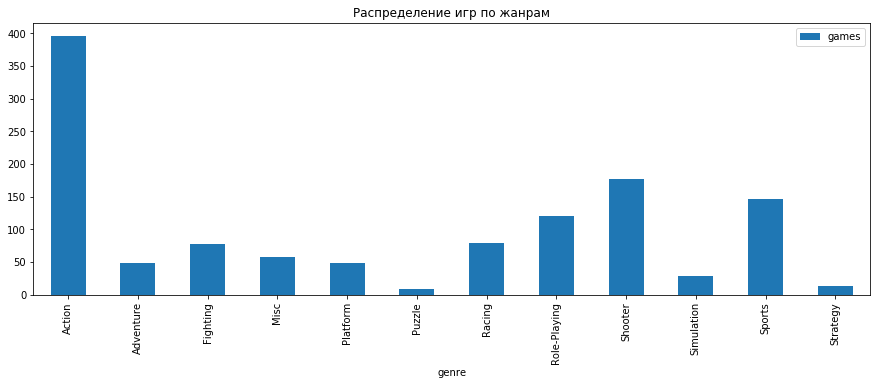

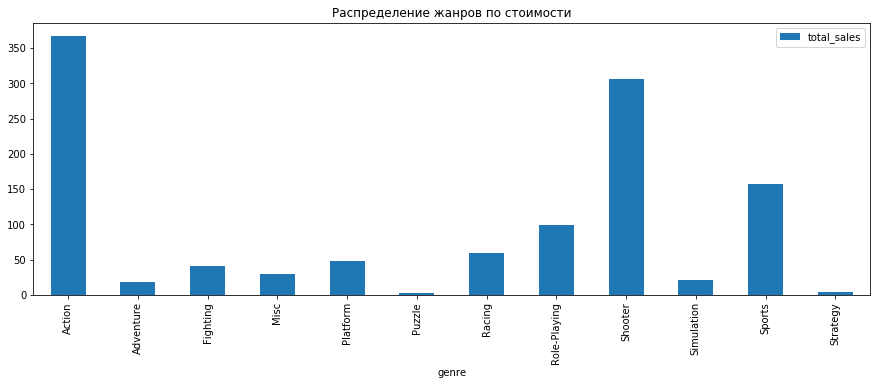

In [14]:
prospective_plfs_data = prospective_plfs_data.reset_index(drop=True)
games_by_genre = prospective_plfs_data.pivot_table(index='genre', values='total_sales', aggfunc='count')
games_by_genre.columns = ['games']
games_by_genre.plot(kind='bar', figsize=(15,5), title='Распределение игр по жанрам')

genre_by_cost = prospective_plfs_data.pivot_table(index='genre', values='total_sales', aggfunc='sum')
genre_by_cost.plot(kind='bar', figsize=(15,5), title='Распределение жанров по стоимости')

Рынок отвечает на запросы потребителей. Самыми популярными и, как следствие, самыми прибыльными являются жанры экшн, шутер и спорт.

### Портрет пользователя каждого региона

#### Северная Америка

In [15]:
#самые популярные платформы (топ-5)

na_platforms = prospective_plfs_data.pivot_table(index='platform', values='na_sales', aggfunc='sum')
na_genre = prospective_plfs_data.pivot_table(index='genre', values='na_sales', aggfunc='sum')

In [16]:
na_platforms.sort_values(by='na_sales', ascending=False).reset_index().head()

,platform,na_sales
0,X360,186.16
1,PS3,136.25
2,PS4,84.46
3,XOne,76.03
4,3DS,48.67


In [17]:
#самые популярные жанры (топ-5)

na_genre.sort_values(by='na_sales', ascending=False).reset_index().head()

,genre,na_sales
0,Action,159.02
1,Shooter,152.96
2,Sports,80.91
3,Role-Playing,42.53
4,Racing,20.91


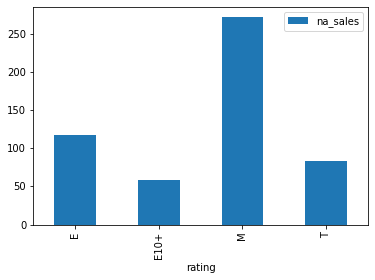

In [18]:
#влияние рейтинга ESRB на продажи в регионе
rating_sales = prospective_plfs_data.pivot_table(index='rating', values='na_sales', aggfunc='sum')
rating_sales.plot(kind='bar')

#### Европа

In [19]:
eu_platforms = prospective_plfs_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
eu_genre = prospective_plfs_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')

In [20]:
eu_platforms.sort_values(by='eu_sales', ascending=False).reset_index().head()

,platform,eu_sales
0,PS3,126.37
1,PS4,112.44
2,X360,94.86
3,XOne,42.23
4,3DS,33.33


В США XBox360 гораздо более популярен, чем в Европе. Самая популярная платформа в Европе - Playstation.

In [21]:
eu_genre.sort_values(by='eu_sales', ascending=False).reset_index().head()

,genre,eu_sales
0,Action,139.32
1,Shooter,109.04
2,Sports,54.71
3,Role-Playing,29.38
4,Racing,27.48


Топ-5 жанров в США и Европе совпадают.

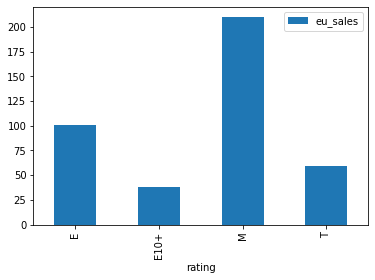

In [22]:
rating_sales = prospective_plfs_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
rating_sales.plot(kind='bar')

График зависимости продаж от рейтинга ESRB в США и Европе совпадают. Самые популярные игры категории М (Mature), то есть для взрослых.

#### Япония

In [23]:
jp_platforms = prospective_plfs_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
jp_genre = prospective_plfs_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')

In [24]:
jp_platforms.sort_values(by='jp_sales', ascending=False).reset_index().head()

,platform,jp_sales
0,3DS,33.87
1,PS3,29.98
2,PS4,9.43
3,X360,2.60
4,XOne,0.29


Самой популярной платформой в Японии оказалась Nintendo 3DS. Playstation так же как в Европе и США находятся в тройке лидеров.

In [25]:
jp_genre.sort_values(by='jp_sales', ascending=False).reset_index().head()

,genre,jp_sales
0,Action,22.63
1,Role-Playing,16.71
2,Shooter,8.44
3,Simulation,7.53
4,Platform,6.50


Как и в Европе, и в США, самым популярным жанром является "экшн". Ролевые игры занимают второе место по популярности в отличие от Евролпы и США, где они занимают четвёртое место. Шутеры в 2 раза менее популярны, чем ролевые игры. Также в пятёрке лидеров находятся симуляторы и платформеры. Возможно, их популярность связана с распространённостью Nintendo 3DS.

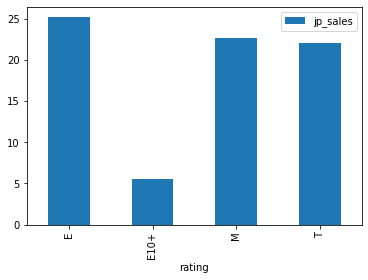

In [26]:
rating_sales = prospective_plfs_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
rating_sales.plot(kind='bar')

График зависимости продаж от рейтинга ESRB в Японии разительно отличается от США и Европы. Самые популярные игры имеют рейтинг Е, то есть "для всех". Игры категории М ("для взрослых") примерно так же популярны как игры "для подростков" (категория Т). Возможно, именно симуляторы и платформеры относятся к категориям Е и Т и влияют на популярность этих категорий в стране.

## 4. Проверка гипотез

**Гипотеза №1** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [27]:
from scipy import stats as st

xbox_one_user_score = games_recent.query('platform == "XOne"')['user_score'].dropna()
pc_user_score = games.query('platform =="PC"')['user_score'].dropna()

alpha = 0.1

xbox_vs_pc = st.ttest_ind(
    xbox_one_user_score, 
    pc_user_score)

print('p-значение:', xbox_vs_pc.pvalue)

if (xbox_vs_pc.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3896435533548819e-05
Отвергаем нулевую гипотезу


Вследствие проверки нулевой гипотезы выяснилось, что гипотеза о равенстве средних генеральных совокупностей не верна. Средний пользовательский рейтинг PC выше, чем у XBox One.

**Гипотеза №2** Средние пользовательские рейтинги жанров "Экшн" и "Спорт" разные

In [28]:
action_user_score = games.query('genre == "Action"')['user_score'].dropna()
sport_user_score = games.query('genre == "Sports"')['user_score'].dropna()

alpha = 0.1

action_vs_sport = st.ttest_ind(
    action_user_score,
    sport_user_score
)

print('p-значение:', action_vs_sport.pvalue)

if (action_vs_sport.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10406951359049141
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза в данном случае говорит о том, что средние пользовательские рейтинги игр в жанрах "Спорт" и "Экшн" равны. Отвергнуть эту гипотезу не получилось. Следовательно, гипотеза №2 не верна, средние рейтинги равны.

## 5. Общий вывод

По результатам проведённого анализа можно сделать вывод о том, что ставку неоходимо делать на игры, удовлетворяющие следующим характеристикам.
1. Жанр "экшн", "спорт" или "шутер".
2. Сделаны под платформы XBox One и PlayStation 4.

<br>Однако это общие выводы для Европы и США. Если рассматривать Японский рынок, то здесь вместо спортивных игр ставку надо делать на ролевые, а также на игры на платформе Nintendo 3DS.